# Final Capstone Project Code

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    libcblas-3.8.0             |      11_openblas          10 KB  conda-forge

## Load the Dataset

In [41]:
df_census = pd.read_csv('Census.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


## Let's check out the dataframe

In [42]:
df_census.head(10)

,FID,NAME,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,...,divorced,consuni,area,popdens,CreationDate,Creator,EditDate,Editor,x,y
0,1,PARADIJS BIJ HEL,23,59,2.6,0,0.000,0.000,0.000,0.000,...,8.2,4.1,0.136,433.823506,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
1,2,ABRAHAMSZ,220,573,2.5,85,0.162,0.651,0.187,0.713,...,7.3,10.0,0.307,1866.449443,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
2,3,PARASASA,78,171,2.2,82,0.164,0.655,0.181,0.520,...,4.9,12.7,0.360,474.999981,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
3,4,MARIA MAAI,245,676,2.5,78,0.195,0.612,0.192,0.768,...,7.9,7.1,0.452,1495.575247,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
4,5,PARERA,22,56,2.5,0,0.000,0.000,0.000,0.000,...,8.5,4.3,0.326,171.779138,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
5,6,AMSTERDAM BIJ STA. ROSA,136,383,2.8,82,0.214,0.721,0.065,0.825,...,3.4,11.8,2.094,182.903525,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
6,7,PIETERMAAI,44,99,1.8,0,0.000,0.000,0.000,0.000,...,2.3,5.7,0.182,543.956055,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
7,8,ARRARATWIJK,11,19,1.7,0,0.000,0.000,0.000,0.000,...,5.6,11.1,0.719,26.425592,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
8,9,PISCADERA BERDE,72,346,2.7,92,0.130,0.494,0.376,0.675,...,14.0,7.8,0.709,488.011289,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
9,10,BAAI MACOLA,34,74,2.2,0,0.000,0.000,0.000,0.000,...,4.5,1.5,0.439,168.564916,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN


## clean up the dataset to remove unnecessary columns and tidying up the data

In [43]:
df_census.drop(['FID','CreationDate','Creator','EditDate','Editor'], axis=1, inplace=True)

# making sure the neighborhoodnames are similar to the ones in the JSON file by capitalizing them
df_census['NAME'] = df_census['NAME'].str.capitalize()
df_census.head(65)

,FID,NAME,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,...,divorced,consuni,area,popdens,CreationDate,Creator,EditDate,Editor,x,y
0,1,Paradijs bij hel,23,59,2.6,0,0.000,0.000,0.000,0.000,...,8.2,4.1,0.136,433.823506,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
1,2,Abrahamsz,220,573,2.5,85,0.162,0.651,0.187,0.713,...,7.3,10.0,0.307,1866.449443,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
2,3,Parasasa,78,171,2.2,82,0.164,0.655,0.181,0.520,...,4.9,12.7,0.360,474.999981,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
3,4,Maria maai,245,676,2.5,78,0.195,0.612,0.192,0.768,...,7.9,7.1,0.452,1495.575247,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
4,5,Parera,22,56,2.5,0,0.000,0.000,0.000,0.000,...,8.5,4.3,0.326,171.779138,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,Zwaan,23,34,1.5,0,0.000,0.000,0.000,0.000,...,6.3,25.0,0.031,1096.774211,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
61,62,Chango bij groot kwartier,45,109,2.4,95,0.165,0.697,0.138,0.661,...,6.7,8.9,0.061,1786.885226,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
62,63,Schelpwijk,382,966,2.5,78,0.151,0.678,0.171,0.740,...,6.2,6.1,4.295,224.912685,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
63,64,Chango bij korporaal,27,55,2.0,0,0.000,0.000,0.000,0.000,...,12.8,0.0,0.046,1195.652172,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN


## let's check out the GeoJson file

In [52]:
import json  
from pandas.io.json import json_normalize  
  
with open('Curacao_AL8.GeoJson') as f: 
    d = json.load(f) 

#see how the name is in the properties and also capitalize it
neighborhoods = json_normalize(d['features']) 

neighborhoods.rename(columns={'properties.name':'Neighborhood'}, inplace=True)
neighborhoods['Neighborhood'] = neighborhoods['Neighborhood'].str.capitalize()
neighborhoods.head()

,type,bbox,properties.srid,properties.id,Neighborhood,properties.localname,properties.official_name,properties.boundary,properties.admin_level,properties.note,properties.wikidata,properties.wikipedia,properties.timestamp,properties.rpath,geometry.type,geometry.coordinates,properties.alltags.name:mk,properties.alltags.wikidata
0,Feature,"[-68.94725, 12.118979, -68.909378, 12.14455]",4326,9506956,Asiento,Asiento,,administrative,8,,,,2019-10-31 23:10:02,"9506956,1216719,2323309,0",MultiPolygon,"[[[[-68.9472469, 12.1305997], [-68.9438488, 12...",NaN,NaN
1,Feature,"[-69.100769, 12.251712, -69.062927, 12.295632]",4326,9507068,Barber,Barber,,administrative,8,,,,2019-10-31 23:10:02,"9507068,1216719,2323309,0",MultiPolygon,"[[[[-69.1007713, 12.2917732], [-69.0996005, 12...",Барбер,NaN
2,Feature,"[-68.925087, 12.098119, -68.912895, 12.108051]",4326,9507096,Berg altena,Berg Altena,,administrative,8,,,,2019-10-31 23:10:02,"9507096,1216719,2323309,0",MultiPolygon,"[[[[-68.9250859, 12.10111287], [-68.9247594, 1...",NaN,NaN
3,Feature,"[-68.893234, 12.133372, -68.859962, 12.15294]",4326,9507087,Bonam,Bonam,,administrative,8,,,,2019-10-31 23:10:02,"9507087,1216719,2323309,0",MultiPolygon,"[[[[-68.8932316, 12.1435611], [-68.8932079, 12...",NaN,NaN
4,Feature,"[-68.900658, 12.142633, -68.872253, 12.16882]",4326,9507086,Brievengat,Brievengat,,administrative,8,,,,2019-10-31 23:10:02,"9507086,1216719,2323309,0",MultiPolygon,"[[[[-68.900658, 12.1584216], [-68.9006489, 12....",NaN,NaN


## Let's see how many neighborhoods are similar in both datasets

In [53]:
new = df_census["NAME"].isin(neighborhoods["Neighborhood"])
df_census2 = df_census[new]
df_census2.head()

,FID,NAME,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,...,divorced,consuni,area,popdens,CreationDate,Creator,EditDate,Editor,x,y
3,4,Maria maai,245,676,2.5,78,0.195,0.612,0.192,0.768,...,7.9,7.1,0.452,1495.575247,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
4,5,Parera,22,56,2.5,0,0.000,0.000,0.000,0.000,...,8.5,4.3,0.326,171.779138,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
10,11,Wacao,40,107,2.7,98,0.187,0.664,0.150,0.841,...,9.4,8.2,2.422,44.178366,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
18,19,Buena vista,1455,3892,2.7,81,0.188,0.643,0.169,0.738,...,7.0,10.4,1.475,2638.644025,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN
19,20,Suffisant,684,1838,2.7,81,0.175,0.631,0.194,0.707,...,9.6,8.4,0.702,2618.233536,"februari 11, 2016",menno_ter_bals,"februari 11, 2016",menno_ter_bals,NaN,NaN


## Let's have a look at the general information on the dataset

In [65]:
df_census.describe()

,FID,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,forborn,...,airpolut,badcond,nvrmarr,married,divorced,consuni,area,popdens,x,y
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,0.0,0.0
mean,146.000000,188.783505,516.731959,2.582818,67.130584,0.153546,0.527997,0.119137,0.590570,0.210117,...,16.787973,7.324742,36.139863,37.317526,6.128866,10.130928,0.706911,1496.933341,NaN,NaN
std,84.148678,241.905377,681.345786,0.475228,34.668630,0.084837,0.268170,0.087312,0.310049,0.141562,...,19.718940,9.094110,11.173617,11.949249,3.022900,4.783355,1.223945,1152.714335,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015000,0.000000,NaN,NaN
25%,73.500000,44.000000,119.000000,2.500000,68.500000,0.136500,0.592500,0.060500,0.558000,0.121500,...,5.500000,1.700000,30.050000,30.600000,4.200000,7.700000,0.095500,689.026366,NaN,NaN
50%,146.000000,98.000000,270.000000,2.600000,81.000000,0.180000,0.652000,0.126000,0.714000,0.215000,...,9.700000,4.900000,37.400000,36.100000,6.100000,9.900000,0.255000,1313.953558,NaN,NaN
75%,218.500000,233.000000,602.000000,2.800000,88.000000,0.207500,0.681500,0.171000,0.805000,0.313000,...,18.250000,9.750000,43.150000,44.550000,7.450000,12.800000,0.737500,1925.938722,NaN,NaN
max,291.000000,1455.000000,3892.000000,5.000000,113.000000,0.329000,0.822000,0.651000,0.953000,0.550000,...,100.000000,95.700000,69.900000,73.700000,27.800000,31.300000,9.495000,7120.482199,NaN,NaN


In [75]:
import matplotlib.pyplot as plt  
%matplotlib inline

## Average Household income

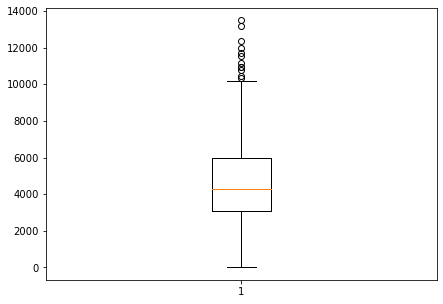

In [60]:
plt.figure(figsize = (7, 5)) 
plt.boxplot(df_census['meanHHinc']) 
  
plt.show() 

## Average Household income spread by population between 15 and 64

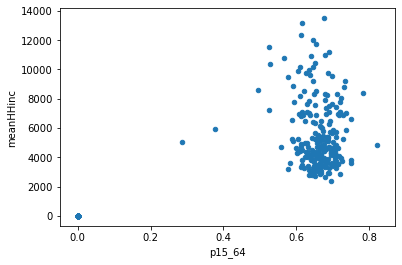

In [64]:
df_census.plot.scatter(x ='p15_64', y ='meanHHinc') 

## Which neighborhoods have the largest mean household income?

In [112]:
df_census2.drop(['FID'], axis=1, inplace=True)

# five largest values in column mean income
df_income = df_census2.nlargest(5, ['meanHHinc']) 
df_income

,NAME,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,forborn,...,airpolut,badcond,nvrmarr,married,divorced,consuni,area,popdens,x,y
237,Mahaai,152,389,2.6,80,0.211,0.612,0.177,0.513,0.487,...,7.9,1.3,23.7,53.0,7.3,6.0,0.455,854.945030,NaN,NaN
109,St. willibrordus,240,588,2.5,85,0.192,0.646,0.162,0.630,0.370,...,6.1,4.3,30.7,41.9,6.9,11.2,2.477,237.383932,NaN,NaN
134,Groot piscadera,240,749,2.7,94,0.124,0.784,0.092,0.721,0.279,...,10.5,2.5,39.9,40.7,3.3,9.3,1.371,546.316537,NaN,NaN
216,Kwarchi,234,670,2.9,95,0.197,0.681,0.122,0.740,0.260,...,4.3,3.9,33.3,45.5,5.2,8.6,0.712,941.011220,NaN,NaN
258,Mon repos,93,270,2.6,80,0.144,0.693,0.163,0.770,0.230,...,9.6,6.5,41.3,43.9,3.5,3.5,0.199,1356.783913,NaN,NaN


## And since we want an italian restaurant, we'd like to know where the largest foreign population is located

In [113]:
# five largest values in column Foreign bron
df_forborn = df_census2.nlargest(5, ['forborn']) 
df_forborn


,NAME,HH,pop,hhsize,sexratio,p0_14,p15_64,p65u,curborn,forborn,...,airpolut,badcond,nvrmarr,married,divorced,consuni,area,popdens,x,y
237,Mahaai,152,389,2.6,80,0.211,0.612,0.177,0.513,0.487,...,7.9,1.3,23.7,53.0,7.3,6.0,0.455,854.945030,NaN,NaN
251,Saliña,151,361,2.4,88,0.186,0.632,0.183,0.627,0.373,...,11.4,2.7,34.4,35.8,7.0,15.1,0.434,831.797263,NaN,NaN
109,St. willibrordus,240,588,2.5,85,0.192,0.646,0.162,0.630,0.370,...,6.1,4.3,30.7,41.9,6.9,11.2,2.477,237.383932,NaN,NaN
174,Zeelandia,88,135,1.5,39,0.067,0.378,0.556,0.630,0.370,...,5.7,0.0,23.0,30.2,27.8,1.6,0.819,164.835164,NaN,NaN
171,Wishi,328,841,2.6,75,0.205,0.669,0.126,0.695,0.305,...,82.2,12.5,46.4,27.8,6.2,11.8,0.369,2279.132866,NaN,NaN


In [48]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [49]:
address = 'Willemstad, Curacao'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Curacao are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Curacao are 12.1091242, -68.9316546.


In [116]:
cur_geo = r'Curacao_AL8.GeoJson' # geojson file

threshold_scale = np.linspace(df_census['meanHHinc'].min(),
                              df_census['meanHHinc'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum

# create a plain world map
cur_map = folium.Map(location=[12.180, -69.000], zoom_start=11)
cur_map

# generate choropleth map using the total population of Curacao
cur_map.choropleth(
    geo_data=cur_geo,
    data=df_census,
    columns=['NAME', 'meanHHinc'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Mean Household Income on Curacao in ANG'
)

# display map
cur_map

In [151]:
import requests
CLIENT_ID = 'JCGUWGP4JE3BFV0KVG0YLN1G24TTJF3WPR45CG5B4M5BS4EQ' # your Foursquare ID
CLIENT_SECRET = 'NHS2XHDZBXZPKGECSJOUDTLDOW2G2VRE4H0KEWGMYPJ2M4OG' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JCGUWGP4JE3BFV0KVG0YLN1G24TTJF3WPR45CG5B4M5BS4EQ
CLIENT_SECRET:NHS2XHDZBXZPKGECSJOUDTLDOW2G2VRE4H0KEWGMYPJ2M4OG


In [173]:
address = 'Mahaai, Curacao'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Curacao are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Curacao are 12.1307888, -68.8968905540736.


In [169]:
search_query = 'restaurant'
radius = 500
print(search_query + ' .... OK!')

restaurant .... OK!


In [182]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(10)

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet
0,4e87bc35f5b94bd578499445,Restaurant Brakkeput Mei Mei,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",v-1574127320,False,12.129700,-68.900010,"[{'label': 'display', 'lat': 12.1297, 'lng': -...",360,CW,"Jan Sofat / Spaanse water, Wil",Curacao,Curaçao,"[Jan Sofat / Spaanse water, Wil, Curacao, Cura...",NaN,NaN
1,4cb1161eb4b0a35d433f4fce,Hai Ba Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1574127320,False,12.131669,-68.897461,"[{'label': 'display', 'lat': 12.131669, 'lng':...",115,CW,NaN,Curacao,Curaçao,"[Cas Coraweg (Mahaai), Curacao, Curaçao]",Cas Coraweg,Mahaai
2,5a0786001c675b126d5e7d1c,Pincho Garden Restaurant And Steak Boutique,"[{'id': '4def73e84765ae376e57713a', 'name': 'P...",v-1574127320,False,12.127910,-68.896980,"[{'label': 'display', 'lat': 12.12791, 'lng': ...",320,CW,Willemstad,NaN,Curaçao,"[Cas Coraweg, Willemstad, Curaçao]",Cas Coraweg,NaN
3,4d55c9489e508cfacf89049b,Supreme Restaurant Equipment & supplies,"[{'id': '4bf58dd8d48988d126951735', 'name': 'V...",v-1574127320,False,12.128302,-68.896328,"[{'label': 'display', 'lat': 12.12830190538713...",283,CW,Willemstad,NaN,Curaçao,"[Cas Cora weg 50 (Mahaai), Willemstad, Curaçao]",Cas Cora weg 50,Mahaai
4,4fe3dc7be4b01ed94b50760c,Al-Diwan Restaurant,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1574127320,False,12.128024,-68.894249,"[{'label': 'display', 'lat': 12.12802410125732...",421,CW,NaN,NaN,Curaçao,[Curaçao],NaN,NaN
5,51aa9129498ea24ab9ab5ae8,Ling Hong,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1574127320,False,12.128720,-68.893423,"[{'label': 'display', 'lat': 12.12871950042185...",442,CW,NaN,NaN,Curaçao,[Curaçao],NaN,NaN


In [175]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Restaurant Brakkeput Mei Mei,Brazilian Restaurant,12.129700,-68.900010,"[{'label': 'display', 'lat': 12.1297, 'lng': -...",360,CW,"Jan Sofat / Spaanse water, Wil",Curacao,Curaçao,"[Jan Sofat / Spaanse water, Wil, Curacao, Cura...",NaN,NaN,4e87bc35f5b94bd578499445
1,Hai Ba Restaurant,Chinese Restaurant,12.131669,-68.897461,"[{'label': 'display', 'lat': 12.131669, 'lng':...",115,CW,NaN,Curacao,Curaçao,"[Cas Coraweg (Mahaai), Curacao, Curaçao]",Cas Coraweg,Mahaai,4cb1161eb4b0a35d433f4fce
2,Pincho Garden Restaurant And Steak Boutique,Portuguese Restaurant,12.127910,-68.896980,"[{'label': 'display', 'lat': 12.12791, 'lng': ...",320,CW,Willemstad,NaN,Curaçao,"[Cas Coraweg, Willemstad, Curaçao]",Cas Coraweg,NaN,5a0786001c675b126d5e7d1c
3,Supreme Restaurant Equipment & supplies,Video Store,12.128302,-68.896328,"[{'label': 'display', 'lat': 12.12830190538713...",283,CW,Willemstad,NaN,Curaçao,"[Cas Cora weg 50 (Mahaai), Willemstad, Curaçao]",Cas Cora weg 50,Mahaai,4d55c9489e508cfacf89049b
4,Al-Diwan Restaurant,Middle Eastern Restaurant,12.128024,-68.894249,"[{'label': 'display', 'lat': 12.12802410125732...",421,CW,NaN,NaN,Curaçao,[Curaçao],NaN,NaN,4fe3dc7be4b01ed94b50760c
5,Ling Hong,Chinese Restaurant,12.128720,-68.893423,"[{'label': 'display', 'lat': 12.12871950042185...",442,CW,NaN,NaN,Curaçao,[Curaçao],NaN,NaN,51aa9129498ea24ab9ab5ae8


In [176]:
dataframe_filtered.name

0                   Restaurant Brakkeput Mei Mei
1                              Hai Ba Restaurant
2    Pincho Garden Restaurant And Steak Boutique
3        Supreme Restaurant Equipment & supplies
4                            Al-Diwan Restaurant
5                                      Ling Hong
Name: name, dtype: object

In [177]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Mahaai

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Mahaai',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map